In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import defaultdict
import re

In [2]:
df1 = pd.read_csv("C:\\Users\\u6067583\\Downloads\\Project\\naukriscrapdata.csv")

In [3]:
df1.drop(['Unnamed: 0'],inplace = True,axis = 1) 
df1.drop_duplicates(inplace=True) 


In [4]:
#data consists of job openings related to techsupport/BPO/Helpdesk and similar unwanted roles which are not required here
Search_for_These_values = ['Help Desk','Helpdesk','tech support','BPO','Testing'] 
pattern = '|'.join(Search_for_These_values)
result = df1[~df1["skills"].str.contains(pattern)]

In [5]:
#picking up location for EDA
result['locations'].value_counts()[:20]
uniq_locs = set()
for loc in result['locations']:
    uniq_locs = uniq_locs.union(set(loc.split(',')))
    
uniq_locs = set([item.strip() for item in uniq_locs])

locations_str = '|'.join(result['locations']) # All locations into a single string for pattern matchings 
loc_dict = defaultdict(int)
for loc in uniq_locs:
    loc_dict[loc] = len(re.findall(loc, locations_str))

In [6]:
# Take the most frequent job locations
jobs_by_loc = pd.Series(loc_dict).sort_values(ascending = False)
print(jobs_by_loc)

jobs_by_loc['Mumbai_MH'] = jobs_by_loc['Mumbai'] + jobs_by_loc['Navi Mumbai'] + jobs_by_loc['Nagpur'] + jobs_by_loc['Mumbai Suburbs'] + jobs_by_loc['Thane'] + jobs_by_loc['Vasai'] + jobs_by_loc['Nasik']
jobs_by_loc['Bengaluru_KA'] = jobs_by_loc['Bengaluru'] + jobs_by_loc['Bengaluru / Bangalore']  + jobs_by_loc['Mysore'] + jobs_by_loc['Bangalore']
jobs_by_loc['Delhi NCR'] = jobs_by_loc['Delhi NCR'] + jobs_by_loc['Delhi'] + jobs_by_loc['Noida'] + jobs_by_loc['Gurgaon'] + jobs_by_loc['Gurgaon Gurugram'] + jobs_by_loc['Greater Noida'] + jobs_by_loc['Delhi/NCR Delhi NCR']
jobs_by_loc['Trivandrum_KL'] = jobs_by_loc['Trivandrum'] + jobs_by_loc['Kochi'] + jobs_by_loc['Kozhikode']
jobs_by_loc['Hyderabad_AP'] = jobs_by_loc['Hyderabad'] + jobs_by_loc['telangana'] + jobs_by_loc['Visakhapatnam'] + jobs_by_loc['Vijayawada']
jobs_by_loc['Ahmedabad_GJ'] = jobs_by_loc['Ahmedabad'] + jobs_by_loc['Vadodara'] + jobs_by_loc['Allahabad'] + jobs_by_loc['Gandhinagar']
jobs_by_loc['Kolkata_WB'] = jobs_by_loc['Kolkata'] 
jobs_by_loc['Chennai_TN'] = jobs_by_loc['Chennai'] + jobs_by_loc['Coimbatore'] 
jobs_by_loc['Pune_MH'] = jobs_by_loc['Pune']
jobs_by_loc.drop(['Delhi','Pune','Noida','Gurgaon','Gurgaon Gurugram','Coimbatore','Chennai','Kolkata','Ahmedabad','Vadodara','Allahabad','Gandhinagar','Vijayawada','Visakhapatnam','telangana','Hyderabad','Trivandrum','Kochi','Kozhikode','Greater Noida','Delhi/NCR Delhi NCR','Bengaluru','Bengaluru / Bangalore','Mysore','Bangalore','Mumbai','Navi Mumbai','Nagpur','Mumbai Suburbs','Thane','Vasai','Nasik'], inplace=True)
jobs_by_loc['PANIndia'] = sum(jobs_by_loc)-(jobs_by_loc['Pune_MH'] + jobs_by_loc['Chennai_TN'] + jobs_by_loc['Kolkata_WB'] + jobs_by_loc['Ahmedabad_GJ'] + jobs_by_loc['Hyderabad_AP'] + jobs_by_loc['Trivandrum_KL'] + jobs_by_loc['Delhi NCR'] + jobs_by_loc['Bengaluru_KA'] + jobs_by_loc['Mumbai_MH'] )

jobs = pd.DataFrame (jobs_by_loc)
df5 = pd.DataFrame(data=jobs.index, columns=['Location'])
df6 = pd.DataFrame(data=jobs.values, columns=['jobcount'])
df7 = pd.merge(df5, df6, left_index=True, right_index=True)
df7.drop(df7.index[1:213],axis=0,inplace=True)

Bengaluru                     1877
Mumbai                         611
Hyderabad                      603
Pune                           498
Chennai                        355
                              ... 
Mumbai(Worli)                    0
Hyderabad(Nanakramguda +1)       0
Chennai(Navalur)                 0
Mumbai(Mumbai Central)           0
Chennai(Chromepet)               0
Length: 245, dtype: int64


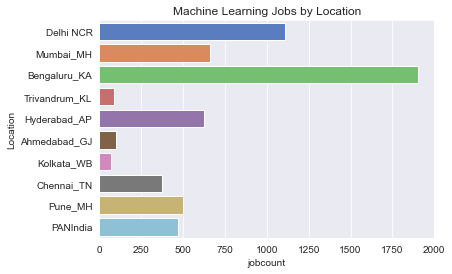

In [7]:
#plotting the locations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

bar_plot = sns.barplot(y=df7.Location,x=df7.jobcount,
                        palette="muted",orient = 'h')                        
plt.title("Machine Learning Jobs by Location")
plt.show()

In [8]:
##checking for roles
result['roles'].value_counts ()[:50]
roledf=pd.DataFrame(result.roles.apply(pd.Series).stack().value_counts()).reset_index()
roledf.columns=["roles","Openings"]
roledf.head()

,roles,Openings
0,Data Scientist,287
1,Data Analyst,217
2,Data Engineer,157
3,Senior Data Scientist,93
4,Business Analyst,64


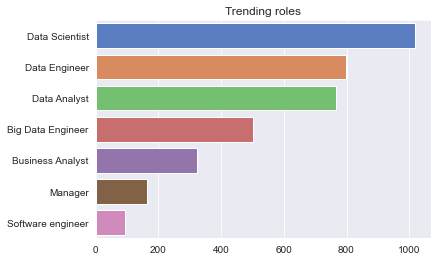

In [9]:
datascience={}
datascience['Data Scientist']=roledf["Openings"][roledf['roles'].str.contains('Data Scien', regex=True)].sum()
datascience['Data Analyst']=roledf["Openings"][roledf['roles'].str.contains('Data Analy', regex=True)].sum()
datascience['Business Analyst']=roledf["Openings"][roledf['roles'].str.contains('Business', regex=True)].sum()
datascience['Big Data Engineer']=roledf["Openings"][roledf['roles'].str.contains('Big', regex=True)].sum()
datascience['Data Engineer']=roledf["Openings"][roledf['roles'].str.contains('Data Engineer', regex=True)].sum()
datascience['Software engineer']=roledf["Openings"][roledf['roles'].str.contains('Software', regex=True)].sum()
datascience['Manager']=roledf["Openings"][roledf['roles'].str.contains('Manager', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience
datascience = pd.Series(datascience)
bar_plot = sns.barplot(y=datascience.index,x=datascience.values,
                        palette="muted",orient = 'h')                                  
plt.title("Trending roles")
plt.show()

C:\Users\u6067583\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\u6067583\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


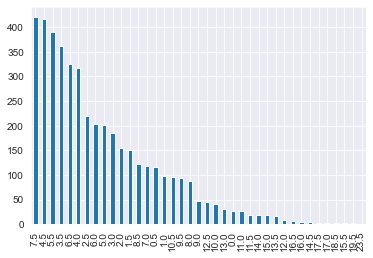

In [10]:
#Checking for experience
result['experience'] = result['experience'].str.replace('Yrs','', regex=True)
result['experience'] = result['experience'].str.replace('None','0-0', regex=True)

#Splitting range in two columns
result=result.join(result['experience'].str.split('-', 1, expand=True).rename(columns={0:'min_exp', 1:'max_exp'}))
result['min_exp'] =result['min_exp'].astype('float64')
result['max_exp'] =result['max_exp'].apply(pd.to_numeric)
col = result.loc[: , "min_exp":"max_exp"]
result['avg_exp']=col.mean(axis=1)

exp_counts = result['avg_exp'].value_counts()
exp_counts.plot.bar(x='index', y='avg_exp')


In [11]:
result['salary'] = result['salary'].str.replace('PA.','', regex=True)
result['salary'] = result['salary'].str.replace(',','', regex=True)
result['salary'] = result['salary'].str.replace('1 Cr and above ','10000000', regex=True)
result['salary'] = result['salary'].str.replace('more than ','', regex=True)